**Importing the Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Loading the Dataset**

In [7]:
df = sns.load_dataset("titanic")

In [9]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Initial Analysis on the Dataset**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [15]:
df.drop(["embarked", "class", "alive"], axis = 1, inplace = True)

In [17]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True


**Exploratory Data Analysis(EDA)**

In [30]:
null_num=[]
for i in df.columns:
    x=df[i].isnull().sum()
    null_num.append(x)

In [32]:
null_num

[0, 0, 0, 177, 0, 0, 0, 0, 0, 688, 2, 0]

In [34]:
pd.DataFrame(null_num, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


<Axes: xlabel='deck', ylabel='count'>

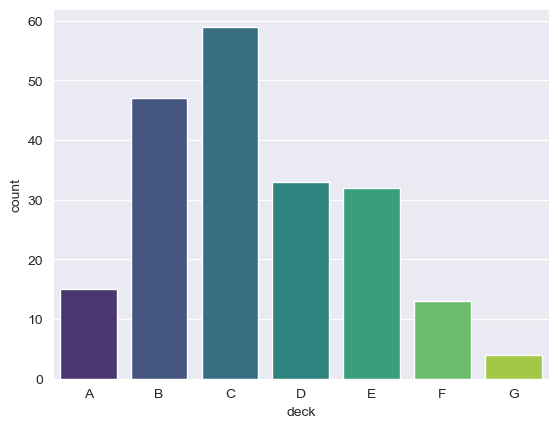

In [36]:
sns.set_style("darkgrid")
sns.countplot(x = "deck", data = df, palette = "viridis")

<Axes: xlabel='deck', ylabel='count'>

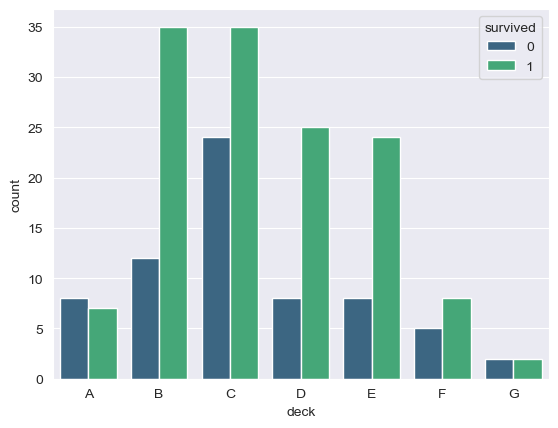

In [38]:
sns.set_style("darkgrid")
sns.countplot(x = "deck", hue= "survived", data = df, palette = "viridis")

In [40]:
df.drop(["deck"], axis = 1, inplace = True)

In [42]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


<Axes: xlabel='pclass', ylabel='age'>

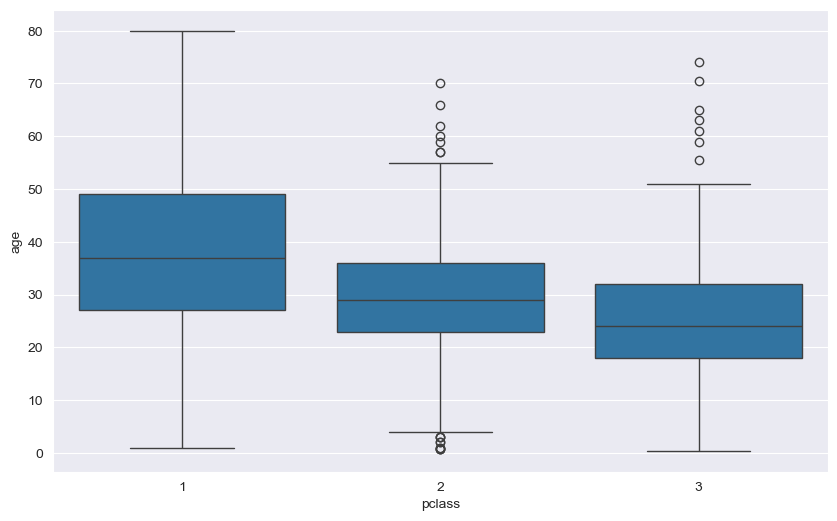

In [44]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = "pclass", y = "age", data = df)

In [46]:
def fillna_age(columns):
    age = columns[0]
    pclass = columns[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 23
    else:
        return age

In [48]:
df.age = df[["age", "pclass"]].apply(fillna_age, axis = 1)

In [50]:
#verification  
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)
    
pd.DataFrame(null_num, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,2


In [52]:
df.dropna(inplace = True)

In [54]:
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)
    
pd.DataFrame(null_num, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,0


<Axes: xlabel='survived', ylabel='count'>

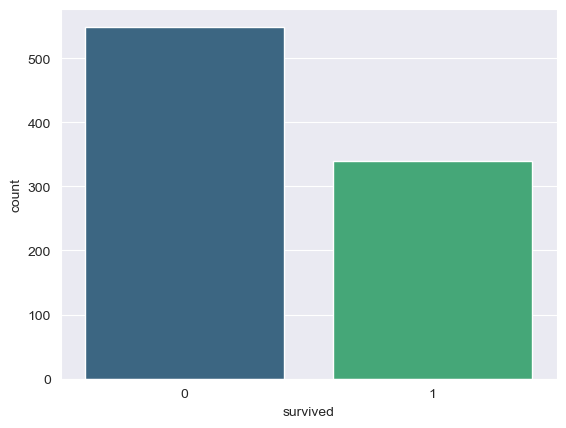

In [56]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", data = df, palette = "viridis")

In [58]:
df.survived.value_counts()

survived
0    549
1    340
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

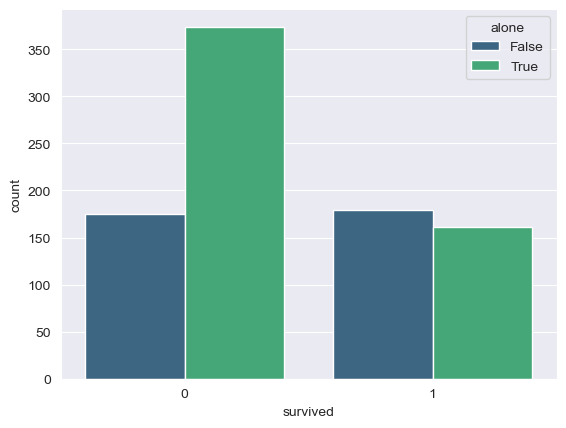

In [60]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue= "alone", data = df, palette = "viridis")

<Axes: xlabel='survived', ylabel='count'>

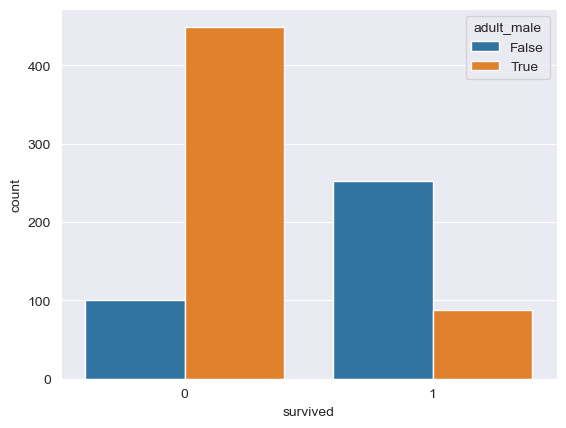

In [62]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue= "adult_male", data = df)

<Axes: xlabel='survived', ylabel='count'>

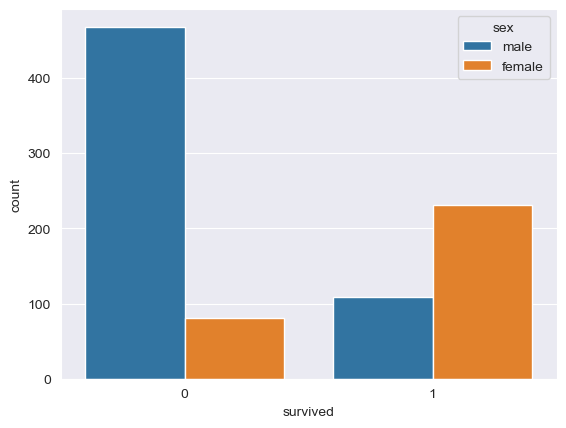

In [64]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue= "sex", data = df)

<Axes: xlabel='survived', ylabel='count'>

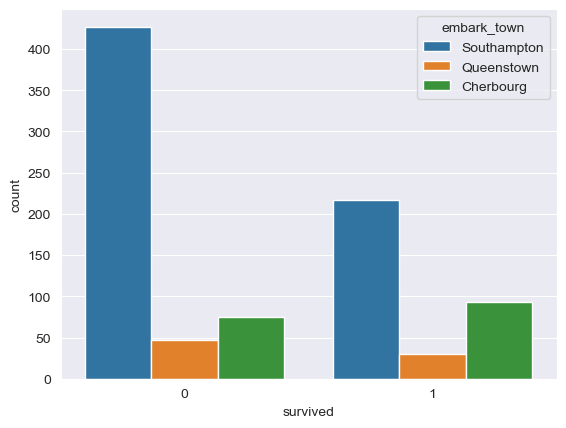

In [66]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue= "embark_town", data = df)

In [68]:

df.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Density'>

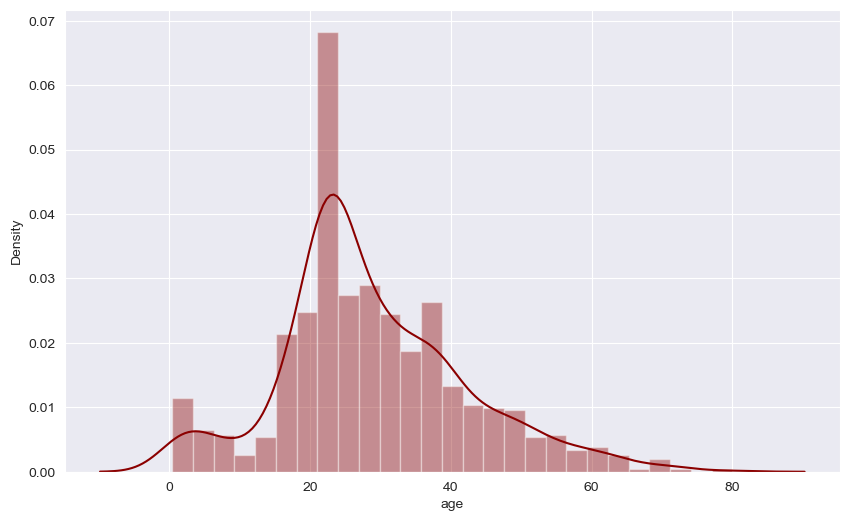

In [70]:
plt.figure(figsize = (10, 6))
sns.distplot(df["age"], color = "darkred")

<Axes: xlabel='fare', ylabel='Density'>

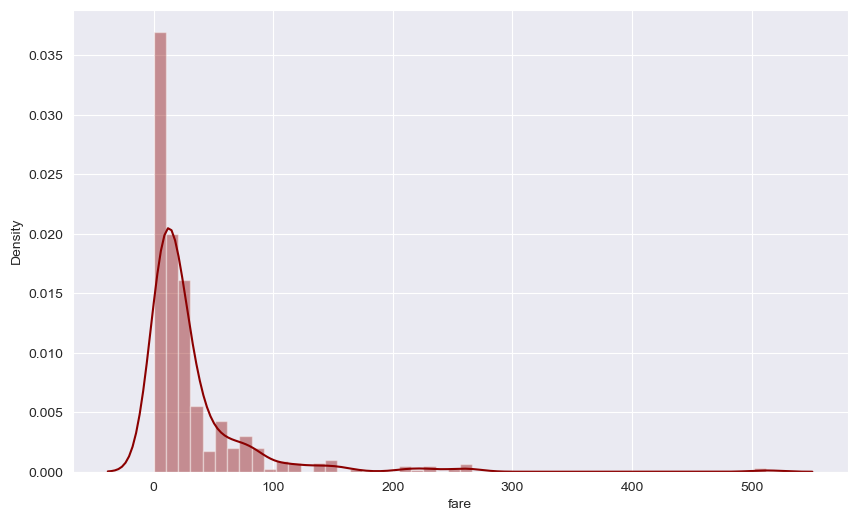

In [72]:
plt.figure(figsize = (10, 6))
sns.distplot(df["fare"], color = "darkred")

In [74]:
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True)

ValueError: could not convert string to float: 'male'

<Figure size 1000x600 with 0 Axes>

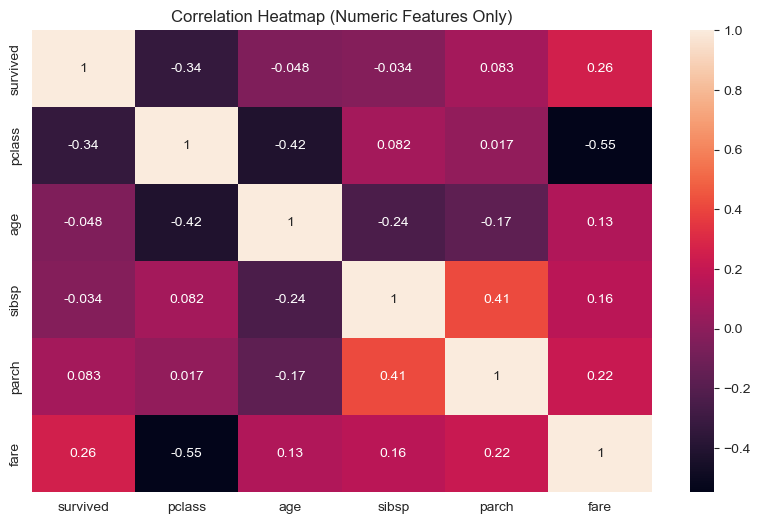

In [78]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True,)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [ ]:
df.drop(["age", "sibsp", "parch"], axis = 1, inplace = True)


In [80]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


In [82]:
sex = pd.get_dummies(df["sex"], drop_first = True)
who = pd.get_dummies(df["who"], drop_first = True)
adult_male = pd.get_dummies(df["adult_male"], drop_first = True)
embark_town = pd.get_dummies(df["embark_town"], drop_first = True)
alone = pd.get_dummies(df["alone"], drop_first = True)

In [84]:
df = pd.concat([df, sex, who, adult_male, embark_town, alone], axis = 1)

In [86]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,male,man,woman,True,Queenstown,Southampton,True
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False,True,True,False,True,False,True,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False,False,False,True,False,False,False,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True,False,False,True,False,False,True,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False,False,False,True,False,False,True,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True,True,True,False,True,False,True,True


In [88]:
df.drop(["sex", "who", "adult_male", "embark_town", "alone"], axis = 1, inplace = True)

In [90]:
df.head()

,survived,pclass,age,sibsp,parch,fare,male,man,woman,True,Queenstown,Southampton,True
0,0,3,22.0,1,0,7.2500,True,True,False,True,False,True,False
1,1,1,38.0,1,0,71.2833,False,False,True,False,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True,False,False,True,True
3,1,1,35.0,1,0,53.1000,False,False,True,False,False,True,False
4,0,3,35.0,0,0,8.0500,True,True,False,True,False,True,True


**Modelling**

In [141]:
df.columns = df.columns.astype(str)

In [95]:
from sklearn.model_selection import train_test_split

In [143]:
# Ensure all column names are strings
df.columns = df.columns.astype(str)

In [147]:
X = df.drop("survived", axis = 1)
y = df["survived"]


In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [151]:
from sklearn.linear_model import LogisticRegression

In [153]:
lr_model = LogisticRegression()

In [155]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [157]:
y_pred = lr_model.predict(X_test)

In [159]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [161]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       141
           1       0.74      0.74      0.74        82

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



In [163]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [165]:
cnf_matrix

array([[120,  21],
       [ 21,  61]], dtype=int64)